# Data Cleaning and Preprocessing with Titanic-Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### `Loading Dataset into our notebook`

In [2]:
df =  pd.read_csv("Titanic-Dataset.xls")

### How's the dataset look like : 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### `Checking Datatypes of data filed in the Dataset`

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## `Starting Data Cleaning.....`

In [6]:
# Droping columns not needed for this analysis
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

### Checking Null or Empty values in our dataset

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## We have found that there are null values in Age filed, we are going to replace the Null values with the Age column mean

In [8]:
df['Age'] = df['Age'].replace(np.NaN,df['Age'].mean())

In [9]:
df = df.dropna(subset=['Embarked'], thresh=1)

In [10]:
# Again checking for the null values in the dataset

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [13]:
#Encoding Categorical Values
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [14]:
#Summary Statistics
print("Summary Statistics")
df.describe()

Summary Statistics


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking the Outliers in the Dataset

<Axes: >

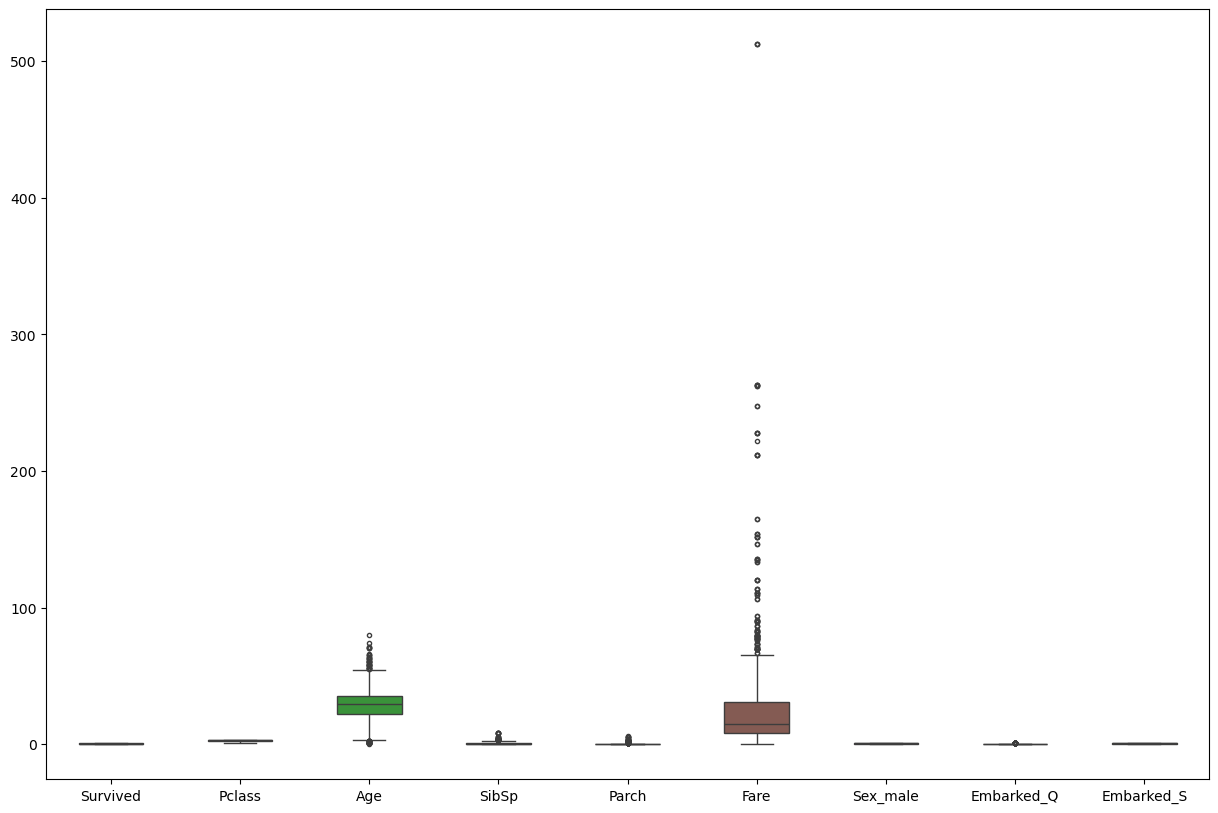

In [15]:
## Checking outliers in dataset 
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

## `As there were outliers in the dataset, we have to remove the outliers from the datset to make the data more efficient for further use case. We are applying IQR(inner Quartile Range) technique to remove the outliers.`

In [16]:
# Creating a function to remove the outliers using IQR
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
    return dataframe

In [17]:
cols_with_outliers = ['Age', 'Fare', 'SibSp', 'Parch']
df_cleaned = remove_outliers_iqr(df, cols_with_outliers)

### ` Verifying the outliers get removed or not `

<Axes: >

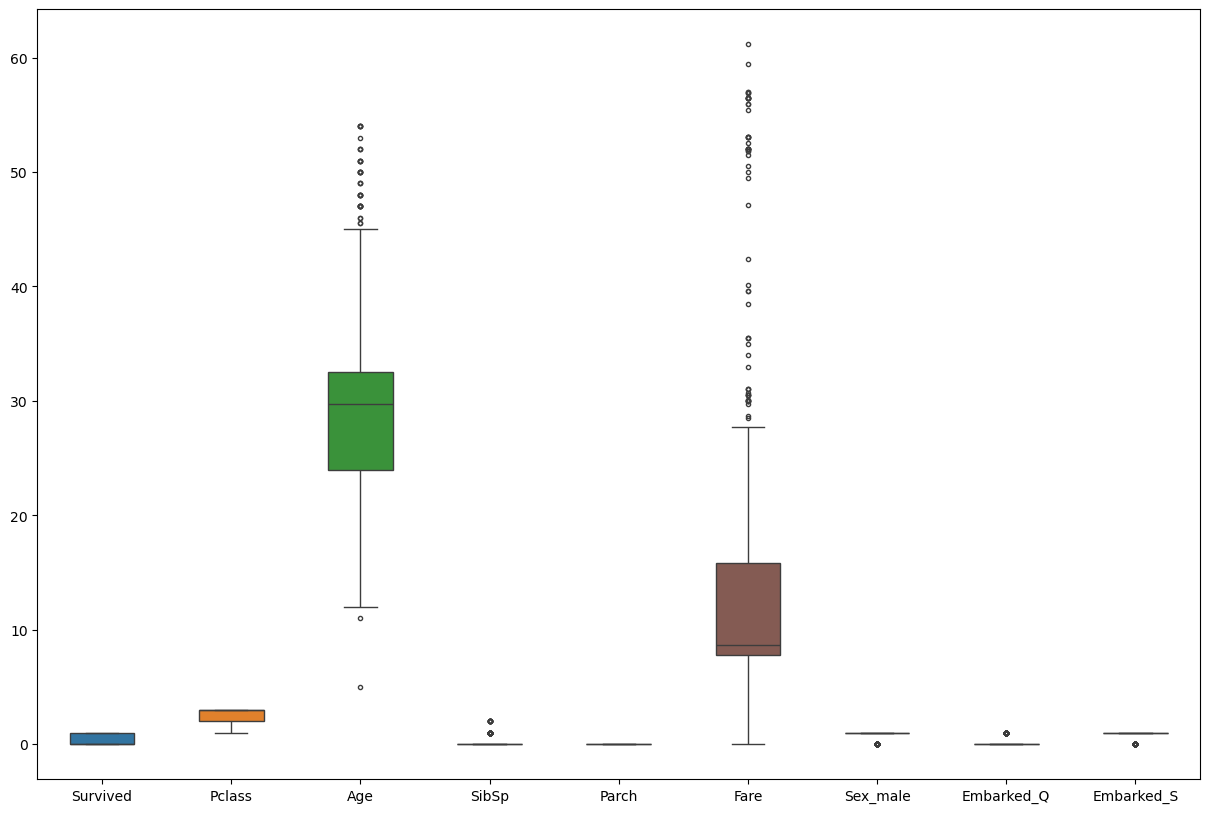

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_cleaned, width=0.5, ax=ax, fliersize=3)

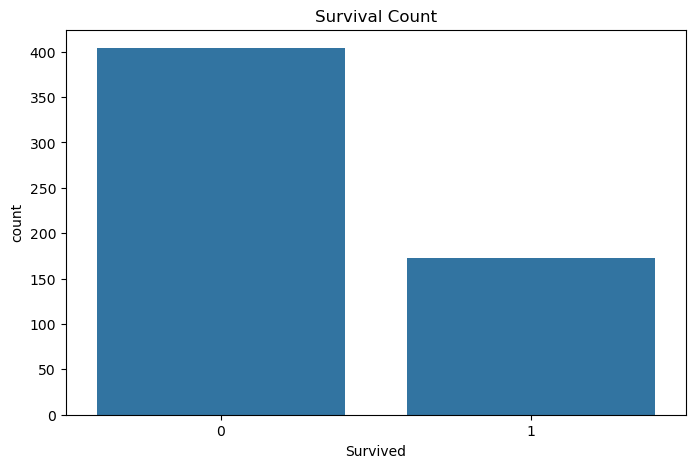

In [19]:
#EDA -Univariate Analysis
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=df_cleaned)
plt.title("Survival Count")
plt.show()

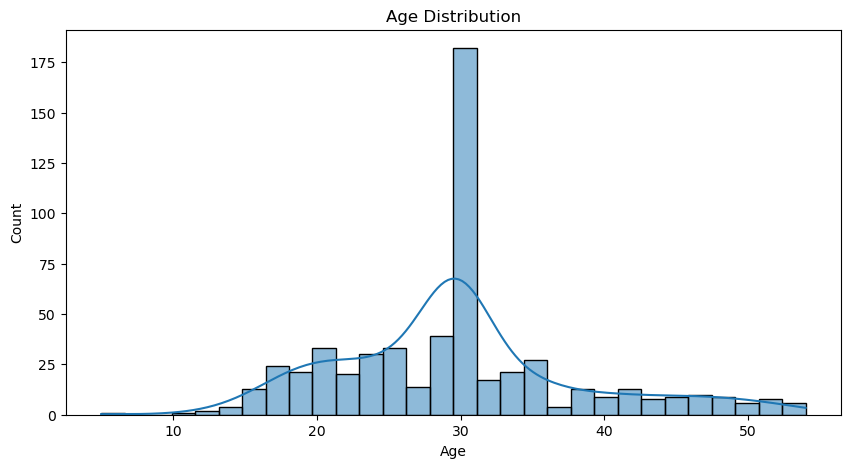

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

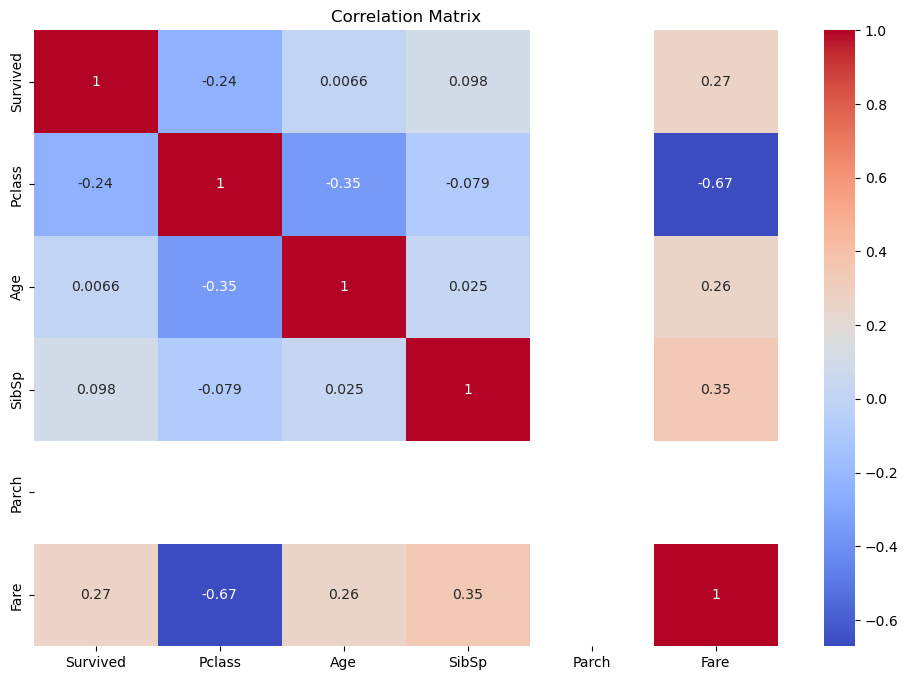

In [21]:
#EDA -Correlation Matrix
numerical_data=df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
correlation_matrix=numerical_data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',)
plt.title("Correlation Matrix")
plt.show()

In [22]:
#Insights from dataset
print("\nCorrelation of features with survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))


Correlation of features with survival:
Survived    1.000000
Fare        0.268890
SibSp       0.097999
Age         0.006573
Pclass     -0.242189
Parch            NaN
Name: Survived, dtype: float64


In [23]:
df_cleaned['family_size'] = df_cleaned['SibSp'] + df_cleaned['Parch']

In [24]:
df_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,family_size
0,0,3,22.000000,1,0,7.2500,True,False,True,1
2,1,3,26.000000,0,0,7.9250,False,False,True,0
3,1,1,35.000000,1,0,53.1000,False,False,True,1
4,0,3,35.000000,0,0,8.0500,True,False,True,0
5,0,3,29.699118,0,0,8.4583,True,True,False,0


# `Creating Plots for the insights that we get from this dataset`

# 1.Overall Survival Rate

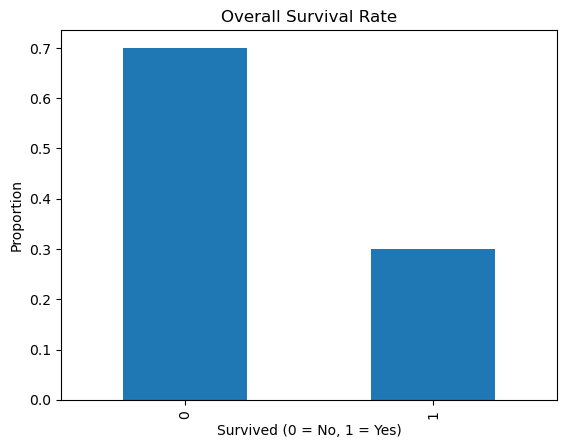

In [25]:
df_cleaned['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title("Overall Survival Rate")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.show()

# 2. Survival by Gender

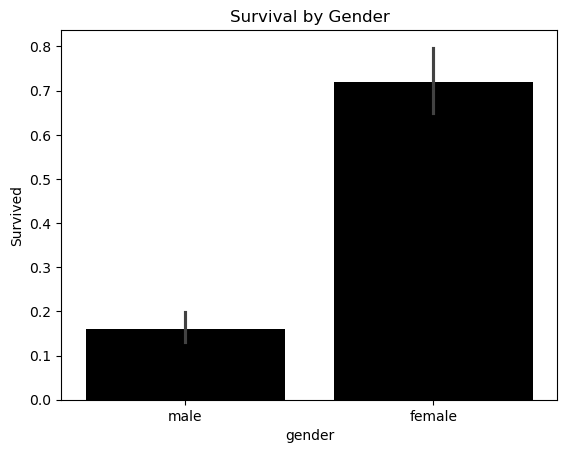

In [26]:
df_cleaned['gender'] = df_cleaned['Sex_male'].apply(lambda x: 'male' if x == 1 else 'female')

sns.barplot(x='gender', y='Survived', data=df_cleaned, color='black')
plt.title("Survival by Gender")
plt.show()

# 3.Survival by Passenger Class

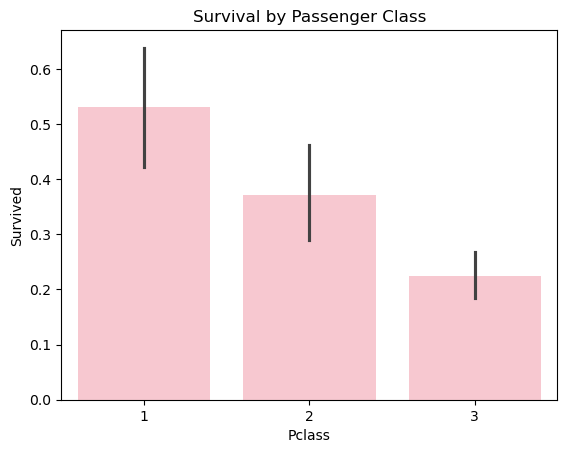

In [27]:
sns.barplot(x='Pclass', y='Survived', data=df_cleaned, color='pink')
plt.title("Survival by Passenger Class")
plt.show()

# 4. Age Distribution by Survival

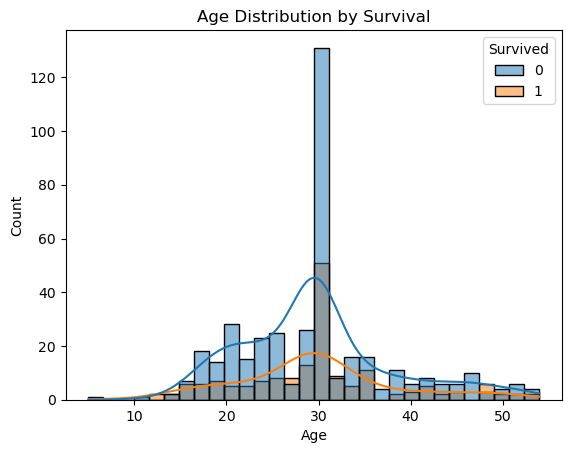

In [28]:
sns.histplot(data=df_cleaned, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# 5. Fare vs. Survival

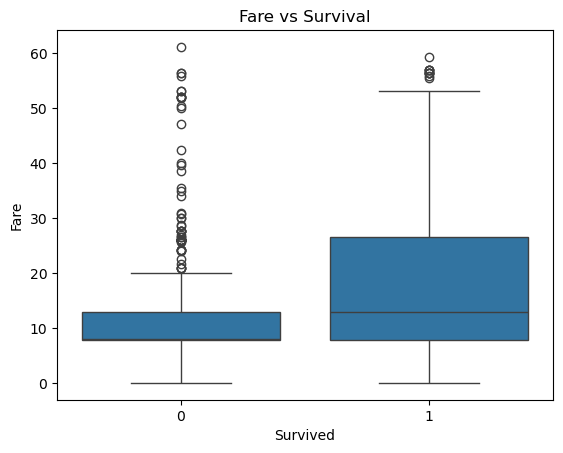

In [29]:
sns.boxplot(x='Survived', y='Fare', data=df_cleaned)
plt.title("Fare vs Survival")
plt.show()

# 6. Family Size vs Survival

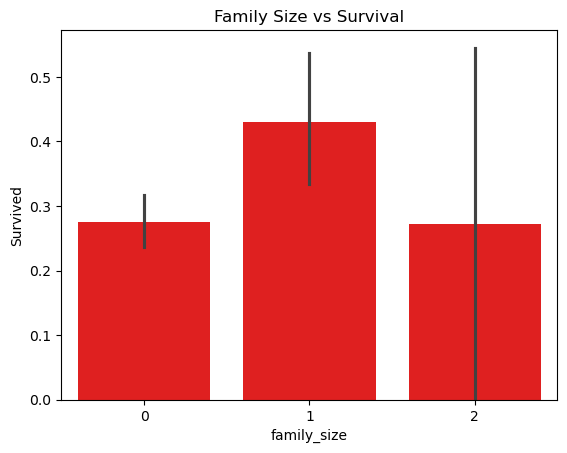

In [30]:
sns.barplot(x='family_size', y='Survived', data=df_cleaned, color='red')
plt.title("Family Size vs Survival")
plt.show()

In [31]:
print("✅ Data cleaning and preprocessing completed successfully.")
print("📊 Insights from the Titanic dataset have been presented above.")

✅ Data cleaning and preprocessing completed successfully.
📊 Insights from the Titanic dataset have been presented above.


In [32]:
df_cleaned.to_csv('cleaned_titanic_data.csv', index=False)